# Question 1




# Question 2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom


### a.

In [ ]:
def Empirical_F(vector):
  vector.sort()

  curr_num = vector[0]
  num_of_entries = len(vector)
  cnt=0
  cum_sum = 0
  empirical_tuple_list = []

  for entry in vector:
    if entry == curr_num:
      cnt+=1
    else:
      cum_sum = cnt/num_of_entries + cum_sum
      empirical_tuple_list.append((curr_num, cum_sum, cnt))
      cnt=1
      curr_num = entry

  #for last occurrence
  cum_sum = cnt/num_of_entries + cum_sum
  empirical_tuple_list.append((curr_num, cum_sum, cnt))
  #

  num_col_list = []
  prob_col_list = []
  for tuple in empirical_tuple_list:
    for i in range(tuple[2]):
      num_col_list.append(tuple[0])
      prob_col_list.append(tuple[1])

  return np.column_stack((np.array(num_col_list), np.array(prob_col_list)))

### b.

In [ ]:
vector_x = binom.rvs(n=5, p=1/6, size=20)

### c.

In [ ]:
print(Empirical_F(vector_x))

[[0.   0.4 ]
 [0.   0.4 ]
 [0.   0.4 ]
 [0.   0.4 ]
 [0.   0.4 ]
 [0.   0.4 ]
 [0.   0.4 ]
 [0.   0.4 ]
 [1.   0.7 ]
 [1.   0.7 ]
 [1.   0.7 ]
 [1.   0.7 ]
 [1.   0.7 ]
 [1.   0.7 ]
 [2.   0.95]
 [2.   0.95]
 [2.   0.95]
 [2.   0.95]
 [2.   0.95]
 [3.   1.  ]]


###d.

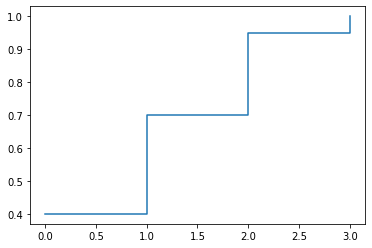

In [ ]:
x = Empirical_F(vector_x)[: , 0]
y = Empirical_F(vector_x)[: , 1]
plt.step(x,y, where="post")
plt.show()

###e.

In [ ]:
vector_y = np.array((0,1,2,3,4,5))
print(binom.cdf(vector_y, 5, 1/6))

[0.40187757 0.80375514 0.96450617 0.99665638 0.9998714  1.        ]


###f.

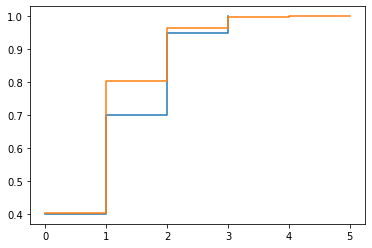

In [ ]:
#d
x = Empirical_F(vector_x)[: , 0]
y = Empirical_F(vector_x)[: , 1]
plt.step(x,y, where="post")

#f
plt.step(vector_y, binom.cdf(vector_y, 5, 1/6), where="post")

plt.show()

- orange graph represent theoretical distribution
- blue graph represent empirical distribution with 20 observations

### g.

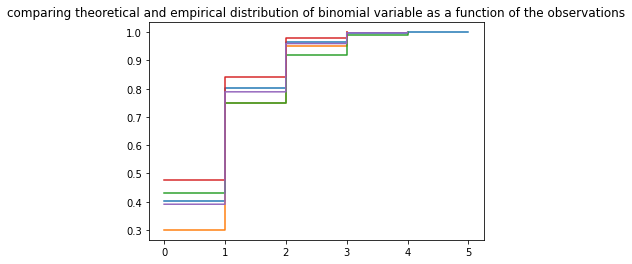

In [ ]:
vector_x_20 = binom.rvs(n=5, p=1/6, size=20)
vector_x_100 = binom.rvs(n=5, p=1/6, size=100)
vector_x_200 = binom.rvs(n=5, p=1/6, size=200)
vector_x_1000 = binom.rvs(n=5, p=1/6, size=1000)

#theoretical
plt.step(vector_y, binom.cdf(vector_y, 5, 1/6), where="post")

#vector_x_20
x_20 = Empirical_F(vector_x_20)[: , 0]
y_20 = Empirical_F(vector_x_20)[: , 1]
plt.step(x_20,y_20, where="post")

#vector_x_100
x_100 = Empirical_F(vector_x_100)[: , 0]
y_100 = Empirical_F(vector_x_100)[: , 1]
plt.step(x_100,y_100, where="post")

#vector_x_200
x_200 = Empirical_F(vector_x_200)[: , 0]
y_200 = Empirical_F(vector_x_200)[: , 1]
plt.step(x_200,y_200, where="post")

#vector_x_1000
x_1000 = Empirical_F(vector_x_1000)[: , 0]
y_1000 = Empirical_F(vector_x_1000)[: , 1]
plt.step(x_1000,y_1000, where="post")

plt.title("comparing theoretical and empirical distribution of binomial variable as a function of the observations")
plt.show()







- blue = theoretical
- orange = 20 observations
- green = 100 observations
- red = 200 observations
- purple = 1000 observations

As one could guess from the begginning, as we add more observations we get a closer results to the theoretical distribution (and therfore the graph will be more close in shape to the thoretical one).

# Question 3


In [ ]:
import pandas as pd
path = "/content/appendicitis.csv"
df = pd.read_csv(path)

### a.


In [ ]:
pathology_col = df.loc[0:len(df), 'Pathology']

cnt = 0
for num in pathology_col:
  if num == 2:
    cnt+=1
print(cnt/len(df))

0.24344569288389514


###b.

In [ ]:
sex_col = df.loc[: , 'Sex']
M1 = 0
M2 = 0
F1 = 0
F2 = 0

for i in range(len(df)):
  if sex_col[i] == 'Male':
    if pathology_col[i] == 1:
      M1+=1
    else:
      M2+=1

  else:
    if pathology_col[i] == 1:
      F1+=1
    else:
      F2+=1


freq_table = pd.DataFrame([['Male', M1,M2], ['Famale', F1, F2]] , index = ['']*2 , columns = ['','1','2'])
print(freq_table)




            1   2
    Male  101  18
  Famale  101  47


### c.
- The empirical probability for a men to be sent to a surgery with no need is $18/129$
- For a women it sits on $47/148$
- In order to answer the last question we first need to compare between 2 equall number of population of the genders, which isn't the case here.

from google.colab import drive
drive.mount('/content/drive')

#Question 4


On one hand, we can notice that the table satisfies P(Alive|Y) < P(Alive|O). On the other hand, for all i∈{1,2,3,crew} we can use simple calculations and derive P(Alive|Y,X=i) < P(Alive|O,X=i). This emphesizes the Simpson paradox: when we take a look on the chances to survive given the age, it appears that apparently old man are more likely to stay alive. However when we look upon each class we get the idea that the opposite occurs- young man are more likely to survive than old one at each of the 4 classes. We get a different conclusion when we add conditioning and that's what the paradox covers.   